In [8]:
# Dependencies
import numpy as np
import pandas as pd 

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [9]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [20]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract


# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june_temps = session.query(Measurement.date, Measurement.prcp).\
                filter(Measurement.date >= '2017-06-01').\
                filter(Measurement.date <= '2017-06-31')

In [17]:
#  3. Convert the June temperatures to a list.
june_results = list(np.ravel(june_temps))
print(june_results)

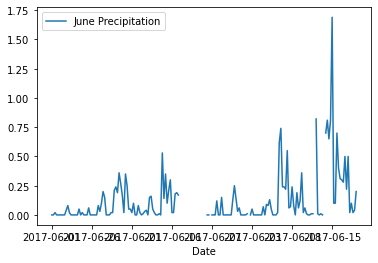

In [29]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_temps_df = pd.DataFrame(june_results, columns = ['Date', 'June Precipitation'])
june_temps_df.set_index(june_temps_df['Date'], inplace=True)
june_temps_df.to_string(index = False)
june_temps_df.plot()

In [31]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temps_df.describe()

,June Precipitation
count,171.000000
mean,0.120000
std,0.217726
min,0.000000
25%,0.000000
50%,0.020000
75%,0.150000
max,1.690000


## D2: Determine the Summary Statistics for December

In [8]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.


In [9]:
# 7. Convert the December temperatures to a list.


In [10]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 


In [11]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
